In [1]:

%load_ext autoreload
%autoreload 2

from pathlib import Path

import seaborn as sns
import sys,os
sys.path.append(os.path.realpath('data_managment/'))
from sampler import Sampler
from s3_connector import download_dataset_version

In [2]:
data_dir = Path('../raw_data/')
save_dir = Path('data/')
path = Path('data/train_dataset.fth')
# dataset = Dataset(data_dir, save_dir)
# dataset.prepare_and_save_data()

100%|██████████| 13236/13236 [00:56<00:00, 233.14it/s]


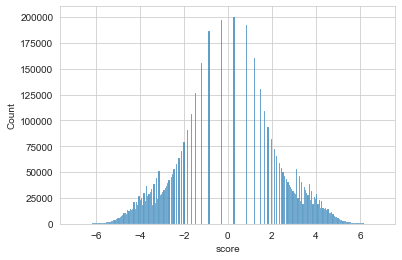

In [4]:
path = Path('data/train_dataset.fth')

sampler = Sampler(path, asymmetric=False, dist_processing='log', sample_size=0.1)
pairs = sampler.sample()
sns.histplot(pairs.score);
pairs.reset_index().to_feather('data/log_symmetric_pairs.fth')

In [5]:
import itertools

all_dataset_params = {
    'dist_processing': ['log', 'normalised', 'multiclass', 'log', 'binary'],
    'sample_method' :['harmonic'],
    'filtration' : ['first_md', 'full'],
    'asymmetric' : [True, False]
}

keys, values = zip(*all_dataset_params.items())
dataset_params = [dict(zip(keys, v)) for v in itertools.product(*values)]

for params in dataset_params:
    print(params)
    sampler = Sampler(path, sample_size=0.01, **params)
    pairs = sampler.sample()

{'dist_processing': 'log', 'sample_method': 'harmonic', 'filtration': 'first_md', 'asymmetric': True}


100%|██████████| 1389/1389 [00:03<00:00, 386.27it/s]


{'dist_processing': 'log', 'sample_method': 'harmonic', 'filtration': 'first_md', 'asymmetric': False}


100%|██████████| 1384/1384 [00:04<00:00, 304.00it/s]


{'dist_processing': 'log', 'sample_method': 'harmonic', 'filtration': 'full', 'asymmetric': True}
empty or non-existing preprocessing was entered


100%|██████████| 1386/1386 [00:04<00:00, 299.91it/s]


{'dist_processing': 'log', 'sample_method': 'harmonic', 'filtration': 'full', 'asymmetric': False}
empty or non-existing preprocessing was entered


100%|██████████| 1384/1384 [00:07<00:00, 194.58it/s]


{'dist_processing': 'normalised', 'sample_method': 'harmonic', 'filtration': 'first_md', 'asymmetric': True}


100%|██████████| 1387/1387 [00:03<00:00, 442.85it/s]


{'dist_processing': 'normalised', 'sample_method': 'harmonic', 'filtration': 'first_md', 'asymmetric': False}


100%|██████████| 1382/1382 [00:04<00:00, 277.93it/s]


{'dist_processing': 'normalised', 'sample_method': 'harmonic', 'filtration': 'full', 'asymmetric': True}
empty or non-existing preprocessing was entered


100%|██████████| 1386/1386 [00:04<00:00, 336.23it/s]


{'dist_processing': 'normalised', 'sample_method': 'harmonic', 'filtration': 'full', 'asymmetric': False}
empty or non-existing preprocessing was entered


100%|██████████| 1385/1385 [00:08<00:00, 172.96it/s]


{'dist_processing': 'multiclass', 'sample_method': 'harmonic', 'filtration': 'first_md', 'asymmetric': True}


100%|██████████| 1385/1385 [00:03<00:00, 438.52it/s]


{'dist_processing': 'multiclass', 'sample_method': 'harmonic', 'filtration': 'first_md', 'asymmetric': False}


100%|██████████| 1389/1389 [00:05<00:00, 232.71it/s]


{'dist_processing': 'multiclass', 'sample_method': 'harmonic', 'filtration': 'full', 'asymmetric': True}
empty or non-existing preprocessing was entered


100%|██████████| 1385/1385 [00:03<00:00, 349.18it/s]


{'dist_processing': 'multiclass', 'sample_method': 'harmonic', 'filtration': 'full', 'asymmetric': False}
empty or non-existing preprocessing was entered


100%|██████████| 1383/1383 [00:10<00:00, 136.15it/s]


{'dist_processing': 'log', 'sample_method': 'harmonic', 'filtration': 'first_md', 'asymmetric': True}


100%|██████████| 1388/1388 [00:03<00:00, 455.91it/s]


{'dist_processing': 'log', 'sample_method': 'harmonic', 'filtration': 'first_md', 'asymmetric': False}


100%|██████████| 1387/1387 [00:04<00:00, 295.65it/s]


{'dist_processing': 'log', 'sample_method': 'harmonic', 'filtration': 'full', 'asymmetric': True}
empty or non-existing preprocessing was entered


100%|██████████| 1387/1387 [00:03<00:00, 410.47it/s]


{'dist_processing': 'log', 'sample_method': 'harmonic', 'filtration': 'full', 'asymmetric': False}
empty or non-existing preprocessing was entered


100%|██████████| 1383/1383 [00:11<00:00, 125.29it/s]


{'dist_processing': 'binary', 'sample_method': 'harmonic', 'filtration': 'first_md', 'asymmetric': True}


100%|██████████| 1388/1388 [00:03<00:00, 396.89it/s]


{'dist_processing': 'binary', 'sample_method': 'harmonic', 'filtration': 'first_md', 'asymmetric': False}


100%|██████████| 1389/1389 [00:05<00:00, 274.66it/s]


{'dist_processing': 'binary', 'sample_method': 'harmonic', 'filtration': 'full', 'asymmetric': True}
empty or non-existing preprocessing was entered


100%|██████████| 1387/1387 [00:04<00:00, 338.14it/s]


{'dist_processing': 'binary', 'sample_method': 'harmonic', 'filtration': 'full', 'asymmetric': False}
empty or non-existing preprocessing was entered


100%|██████████| 1388/1388 [00:08<00:00, 171.68it/s]


In [42]:
download_dataset_version('2022-06-30', )

16it [00:00, 27.64it/s]


# Markdown ranks dataset

In [3]:
path = Path('data/train_dataset.fth')
sampler = Sampler(path)
rank_df = sampler.sample_ranks()
rank_df.head()

,source,pct_rank,ancestor_id
58,## Note : This Kernel is a Fork from the amazi...,0.000000,aa2da37e
59,## About The Competition : Detecting Steel Def...,0.010753,aa2da37e
60,Reference :http://faculty.neu.edu.cn/yunhyan/...,0.021505,aa2da37e
61,## import modules and define models,0.032258,aa2da37e
68,* There are similar numbers of images with and...,0.107527,aa2da37e


In [4]:
rank_df.reset_index().to_feather('data/train_markdown_ranks.fth')